# Similarity in Charles Darwin's books

In [26]:
import glob
import re, os
from nltk.stem import PorterStemmer
from gensim import corpora
import pandas as pd
from gensim.models import TfidfModel
from gensim import similarities
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster import hierarchy

In [30]:
files = glob.glob('datasets/*.txt')
files.sort()
print(files)

['datasets/Autobiography.txt', 'datasets/CoralReefs.txt', 'datasets/DescentofMan.txt', 'datasets/DifferentFormsofFlowers.txt', 'datasets/EffectsCrossSelfFertilization.txt', 'datasets/ExpressionofEmotionManAnimals.txt', 'datasets/FormationVegetableMould.txt', 'datasets/FoundationsOriginofSpecies.txt', 'datasets/GeologicalObservationsSouthAmerica.txt', 'datasets/InsectivorousPlants.txt', 'datasets/LifeandLettersVol1.txt', 'datasets/LifeandLettersVol2.txt', 'datasets/MonographCirripedia.txt', 'datasets/MonographCirripediaVol2.txt', 'datasets/MovementClimbingPlants.txt', 'datasets/OriginofSpecies.txt', 'datasets/PowerMovementPlants.txt', 'datasets/VariationPlantsAnimalsDomestication.txt', 'datasets/VolcanicIslands.txt', 'datasets/VoyageBeagle.txt']


In [4]:
txts = []
titles = []

for n in files:
    f = open(n, encoding='utf-8-sig')
    data = re.sub(r'[\W_]+', ' ', f.read())
    txts.append(data)
    titles.append(os.path.basename(n).replace('.txt', ''))

[len(t) for t in txts]

[123231,
 496068,
 1776539,
 617088,
 913713,
 624232,
 335920,
 523021,
 797401,
 901406,
 1047518,
 1010643,
 767492,
 1660866,
 298319,
 916267,
 1093567,
 1043499,
 341447,
 1149574]

In [5]:
for i in range(len(titles)):
        ori = titles.index('OriginofSpecies')

print(ori)

15


In [6]:
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

txts_lower_case = list(map(str.lower, txts))

txts_split = [txts_lower.split() for txts_lower in txts_lower_case]

texts = [[word for word in txt if word not in stoplist] for txt in txts_split]

texts[0:20]

[['autobiography',
  'charles',
  'darwin',
  'from',
  'life',
  'letters',
  'charles',
  'darwin',
  'by',
  'charles',
  'darwin',
  'edited',
  'by',
  'his',
  'son',
  'francis',
  'darwin',
  'father',
  's',
  'autobiographical',
  'recollections',
  'given',
  'present',
  'chapter',
  'were',
  'written',
  'his',
  'children',
  'written',
  'without',
  'any',
  'thought',
  'they',
  'would',
  'ever',
  'published',
  'many',
  'this',
  'seem',
  'an',
  'impossibility',
  'but',
  'those',
  'knew',
  'father',
  'will',
  'understand',
  'how',
  'it',
  'was',
  'not',
  'only',
  'possible',
  'but',
  'natural',
  'autobiography',
  'bears',
  'heading',
  'recollections',
  'development',
  'mind',
  'character',
  'end',
  'with',
  'following',
  'note',
  'aug',
  '3',
  '1876',
  'this',
  'sketch',
  'life',
  'was',
  'begun',
  'about',
  '28th',
  'hopedene',
  'mr',
  'hensleigh',
  'wedgwood',
  's',
  'house',
  'surrey',
  'since',
  'then',
  'have',


In [8]:
porter = PorterStemmer()

texts_stem = [[porter.stem(token) for token in text] for text in texts]

print(texts_stem[15][0:20])

['on', 'origin', 'speci', 'but', 'with', 'regard', 'materi', 'world', 'can', 'least', 'go', 'so', 'far', 'thi', 'can', 'perceiv', 'event', 'are', 'brought', 'about']


In [12]:
dictionary = corpora.Dictionary(texts_stem)

bows = [dictionary.doc2bow(book) for book in texts_stem]

bows[15][:5]

[(0, 11), (5, 51), (6, 1), (8, 2), (21, 1)]

In [14]:
df_bow_origin = pd.DataFrame(bows[ori])

df_bow_origin.columns = ['index', 'occurrences']

df_bow_origin['token'] = [dictionary[index] for index in df_bow_origin["index"]]

print(df_bow_origin.sort_values(by='occurrences', ascending=False).head(10))

      index  occurrences  token
748    1168         2023   have
1119   1736         1558     on
1489   2288         1543  speci
892    1366         1480     it
239     393         1362     by
1128   1747         1201     or
125     218         1140    are
665    1043         1137   from
1774   2703         1000   with
1609   2452          962    thi


In [16]:
model = TfidfModel(bows)

print(model[bows[ori]])

[(8, 0.00020408683039616044), (21, 0.0005723177174474165), (23, 0.001714008058633542), (27, 0.0006466337090765656), (28, 0.0025710120879503125), (31, 0.000857004029316771), (35, 0.001016241827361025), (36, 0.001016241827361025), (51, 0.0008878482198272165), (54, 0.00203248365472205), (56, 0.0023786863377481767), (57, 0.00010204341519808022), (63, 0.0027579084706411254), (64, 0.000510217075990401), (66, 0.00020408683039616044), (67, 0.0023786863377481767), (68, 0.00203248365472205), (75, 0.0013789542353205627), (76, 0.00044392410991360827), (78, 0.004177054182752995), (80, 0.0020885270913764977), (83, 0.008584765761711247), (84, 0.000510217075990401), (88, 0.0024490419647539255), (89, 0.0033674327015366474), (90, 0.0008878482198272165), (91, 0.0016768424759030323), (94, 0.0008878482198272165), (95, 0.00044392410991360827), (96, 0.003551392879308866), (97, 0.0016326946431692835), (102, 0.03773354934265671), (104, 0.0009183907367827219), (106, 0.00141914571211187), (108, 0.003547864280279

In [17]:
df_tfidf = pd.DataFrame(model[bows[ori]])

df_tfidf.columns = ['id', 'score']

df_tfidf['token'] = [dictionary[index] for index in list(df_tfidf["id"])]

print(df_tfidf.sort_values(by='score', ascending=False).head(10))

         id     score      token
880    2164  0.327823     select
3103  10108  0.204162     pigeon
128     369  0.197968      breed
2985   9395  0.167705     migrat
947    2325  0.148371     steril
285     752  0.146172     domest
504    1255  0.128433     hybrid
371     966  0.127694     fertil
3840  16046  0.124547    gärtner
3536  12729  0.121348  naturalis


In [19]:
sims = similarities.MatrixSimilarity(model[bows])

sim_df = pd.DataFrame(list(sims))

sim_df.index = titles
sim_df.columns = titles

display(sim_df)

,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.049722,0.080789,0.066615,0.077006,0.089345,0.041182,0.058990,0.030679,0.014945,0.399534,0.220023,0.005854,0.008456,0.022999,0.101199,0.016059,0.048989,0.038630,0.184288
CoralReefs,0.049722,1.000000,0.009516,0.001980,0.001936,0.005062,0.029445,0.022066,0.060744,0.002284,0.031211,0.017772,0.006321,0.010497,0.001534,0.039200,0.002686,0.011383,0.057402,0.267414
DescentofMan,0.080789,0.009516,1.000000,0.072792,0.029997,0.148642,0.027106,0.135001,0.009628,0.009468,0.060040,0.080569,0.053426,0.042937,0.005157,0.267734,0.011267,0.228437,0.007885,0.123902
DifferentFormsofFlowers,0.066615,0.001980,0.072792,1.000000,0.391788,0.006545,0.010621,0.039993,0.002855,0.007487,0.016188,0.046692,0.009403,0.005451,0.008165,0.129152,0.018831,0.049405,0.002624,0.013213
EffectsCrossSelfFertilization,0.077006,0.001936,0.029997,0.391788,1.000000,0.006871,0.032270,0.040248,0.002247,0.006763,0.019609,0.046567,0.003218,0.002957,0.014939,0.146700,0.039520,0.054458,0.002183,0.017183
ExpressionofEmotionManAnimals,0.089345,0.005062,0.148642,0.006545,0.006871,1.000000,0.021066,0.047103,0.005246,0.011461,0.065391,0.049333,0.016802,0.029644,0.005942,0.063242,0.011234,0.082567,0.005595,0.099124
FormationVegetableMould,0.041182,0.029445,0.027106,0.010621,0.032270,0.021066,1.000000,0.021468,0.067712,0.035498,0.028357,0.023943,0.019864,0.023915,0.038823,0.049519,0.039911,0.032647,0.059299,0.098331
FoundationsOriginofSpecies,0.058990,0.022066,0.135001,0.039993,0.040248,0.047103,0.021468,1.000000,0.027300,0.005995,0.057749,0.054703,0.007650,0.010762,0.003971,0.322736,0.008712,0.196578,0.017528,0.089075
GeologicalObservationsSouthAmerica,0.030679,0.060744,0.009628,0.002855,0.002247,0.005246,0.067712,0.027300,1.000000,0.006844,0.028691,0.012241,0.009260,0.023486,0.002046,0.052878,0.003450,0.013737,0.372272,0.259514
InsectivorousPlants,0.014945,0.002284,0.009468,0.007487,0.006763,0.011461,0.035498,0.005995,0.006844,1.000001,0.006062,0.016549,0.019091,0.019657,0.249011,0.014982,0.022841,0.010321,0.008526,0.014758


[]

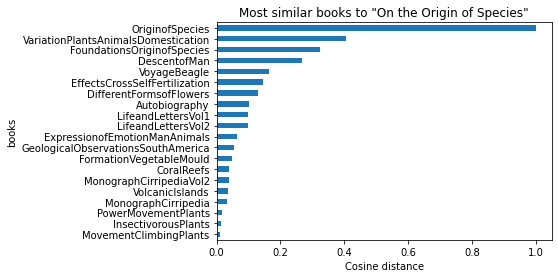

In [21]:
v = sim_df['OriginofSpecies']

v_sorted = v.sort_values(ascending=True)

v_sorted.plot.barh(x='lab', y='val', rot=0)

plt.xlabel('Cosine distance')
plt.ylabel('books')
plt.title('Most similar books to "On the Origin of Species"')
plt.plot()

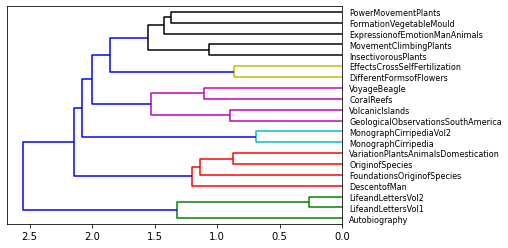

In [24]:
Z = hierarchy.linkage(sim_df,'ward')
_ = hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation="left")